##**1. Importing the necessary libraries and dataset**

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from joblib import dump

In [2]:
#Load training and test sets
train_data = pd.read_csv('/content/Training.csv')
test_data = pd.read_csv('/content/Testing.csv')

In [ ]:
#visualising the train dataset - by printing the first 10 rows
train_data.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
8,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
9,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
#visualising the test dataset - by printing the first 10 rows
test_data.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bronchial Asthma


We see that the data is already encoded.

In [ ]:
train_data.columns[30:60]

Index(['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine',
       'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload',
       'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise',
       'blurred_and_distorted_vision', 'phlegm', 'throat_irritation',
       'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements'],
      dtype='object')

#**2. Data Visualisation**

Acne                                       120
Migraine                                   120
Alcoholic hepatitis                        120
Common Cold                                120
Hepatitis C                                120
Arthritis                                  120
Typhoid                                    120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Chicken pox                                120
Hepatitis E                                120
Psoriasis                                  120
Malaria                                    120
Paralysis (brain hemorrhage)               120
Heart attack                               120
Osteoarthristis                            120
Impetigo                                   120
Diabetes                                   120
Fungal infection                           120
Jaundice                                   120
(vertigo) Paroymsal  Positional Vertigo    120
Hepatitis B  

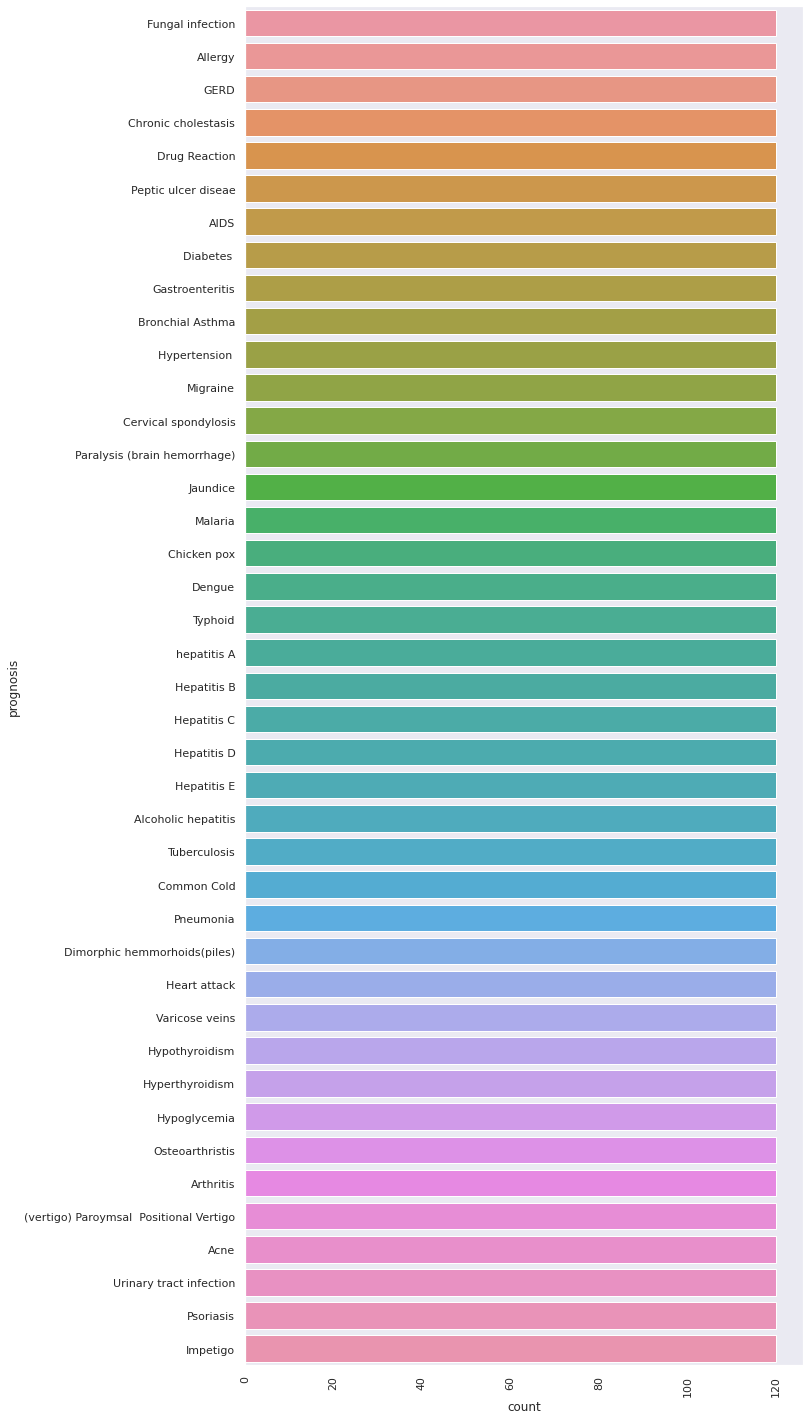

In [ ]:
#lets see value counts and also visualize them
sns.set_theme(style="dark")
plt.figure(figsize = (10,25))
plt.xticks(rotation = 90)
sns.countplot(y="prognosis", data=train_data)
print(train_data["prognosis"].value_counts())

We see that the data is balanced.

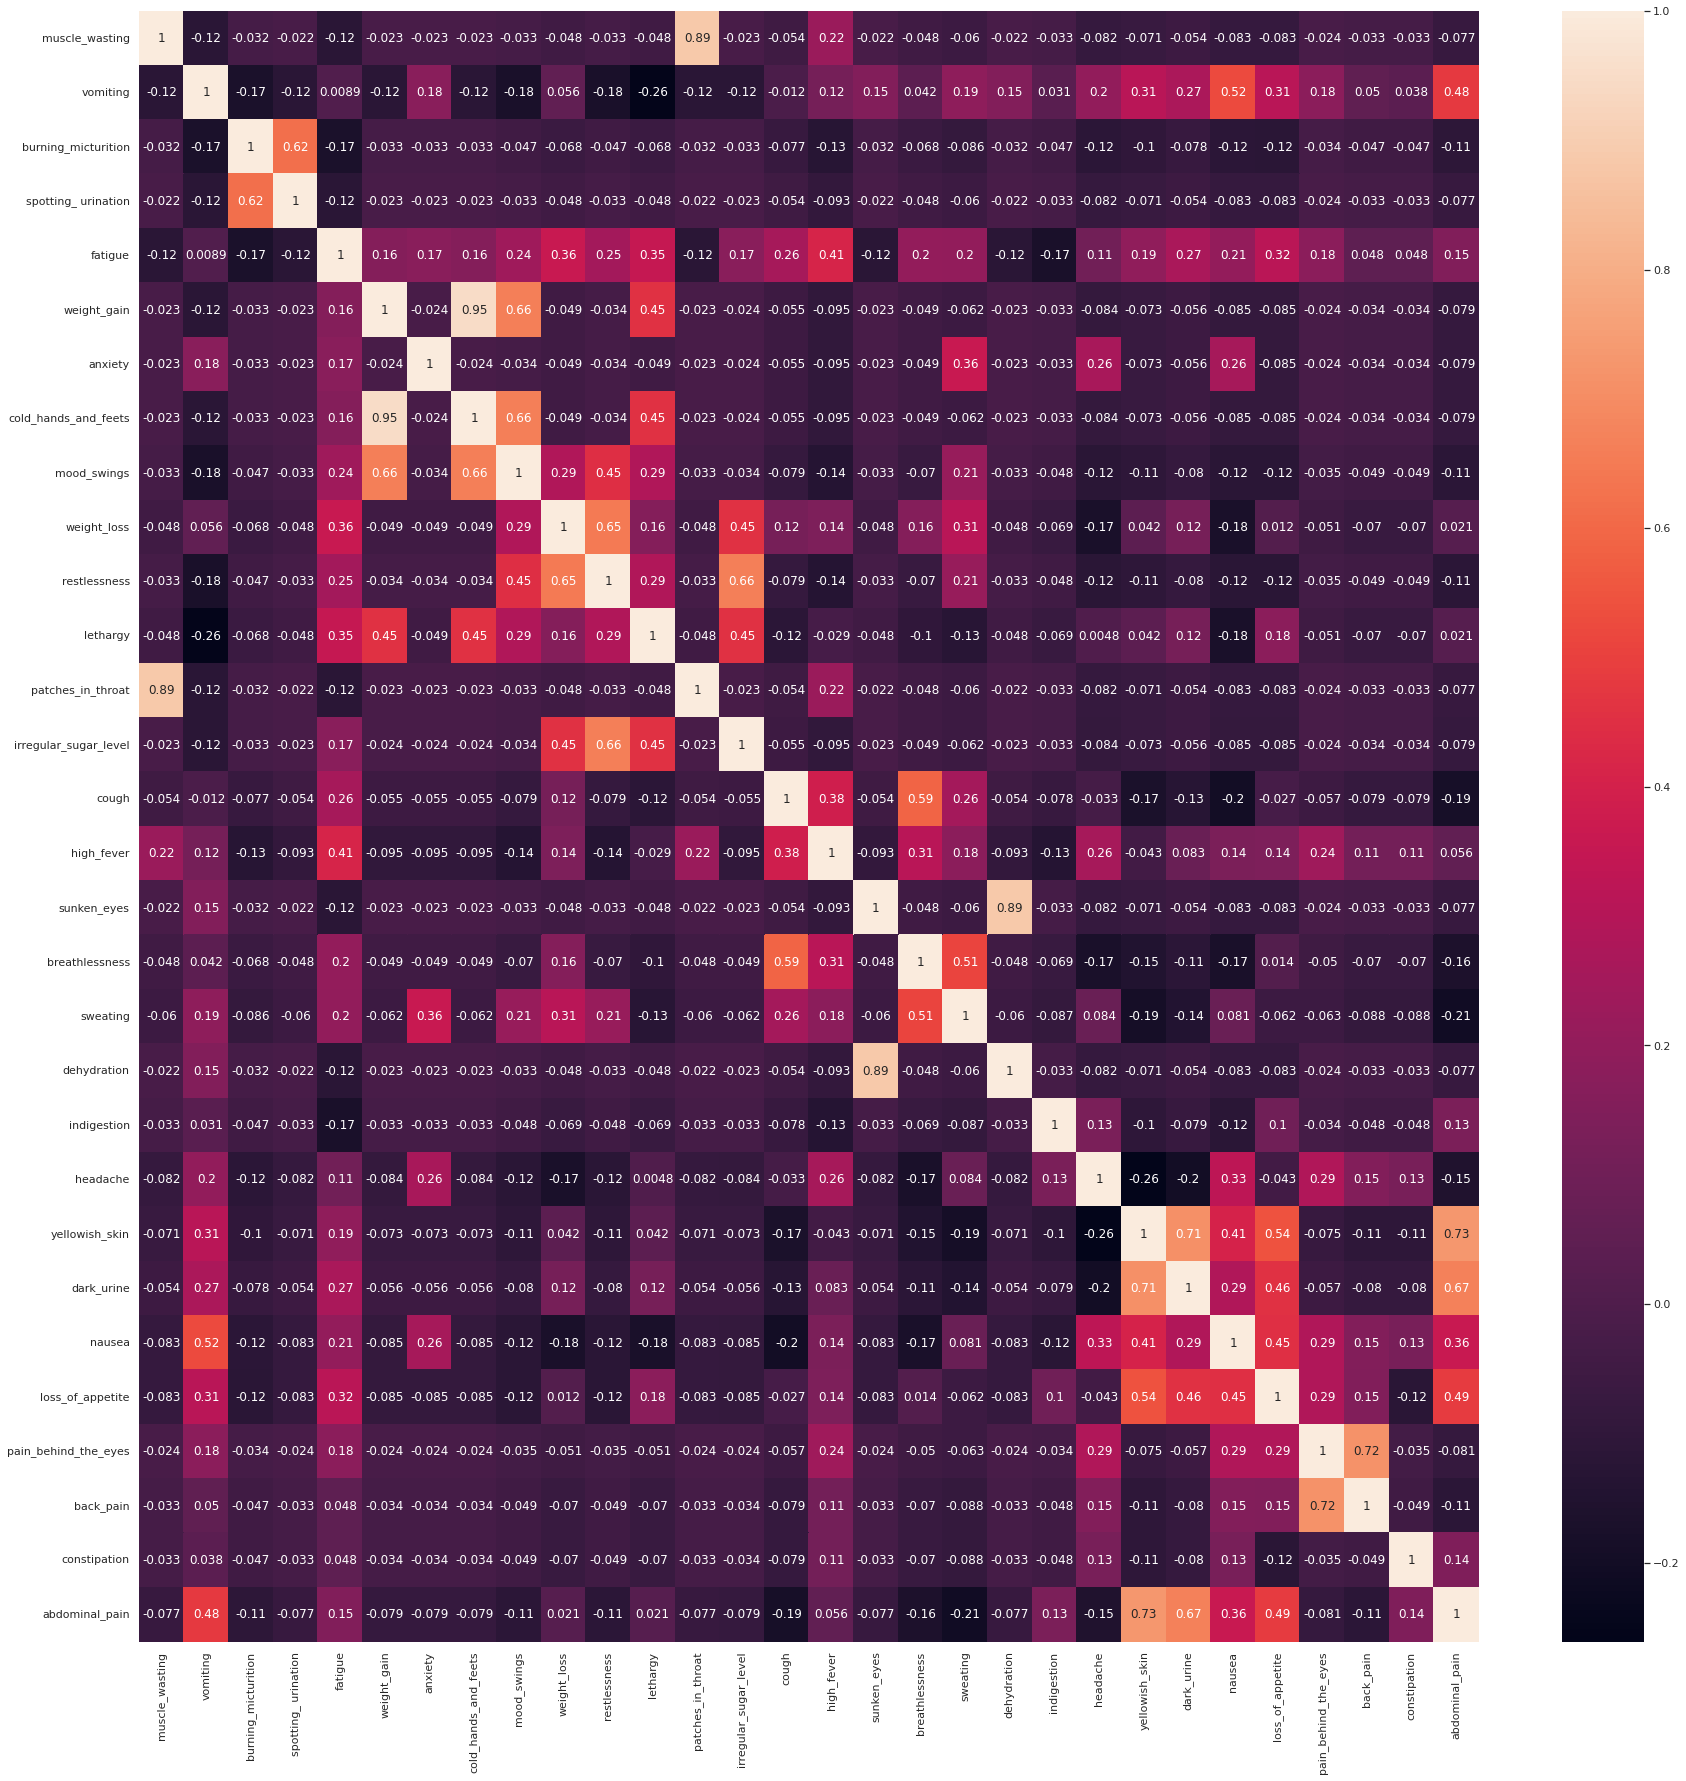

In [ ]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?
df_corr = train_data.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

As we look at from correlation map, we can infer these:

- yellowish skin and abdominal pain have a high correlation coefficent which means these features usually seem together (maybe a liver problem)
- cough and breathlessness also have high correlation (it's usual because lung diseases give the same symptoms)
- restlessness and irregular sugar usually seem together

## Few points about correlation
* Values closer to zero means there is no linear trend between the two variables.
* The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 
* A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

#**3. Data Cleaning**

In [ ]:
#as we see there is an extra column present at last of train dataset, we exclude that
train_data.drop(['Unnamed: 133'], axis=1, inplace=True)

In [ ]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 133 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   itching                         int64 
 1   skin_rash                       int64 
 2   nodal_skin_eruptions            int64 
 3   continuous_sneezing             int64 
 4   shivering                       int64 
 5   chills                          int64 
 6   joint_pain                      int64 
 7   stomach_pain                    int64 
 8   acidity                         int64 
 9   ulcers_on_tongue                int64 
 10  muscle_wasting                  int64 
 11  vomiting                        int64 
 12  burning_micturition             int64 
 13  spotting_ urination             int64 
 14  fatigue                         int64 
 15  weight_gain                     int64 
 16  anxiety                         int64 
 17  cold_hands_and_feets            int64 
 18  mood_sw

We have 4920 entries of data (row) and 132 variables (columns) and 1 target variable with a string format

In [ ]:
test_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 133 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   itching                         int64 
 1   skin_rash                       int64 
 2   nodal_skin_eruptions            int64 
 3   continuous_sneezing             int64 
 4   shivering                       int64 
 5   chills                          int64 
 6   joint_pain                      int64 
 7   stomach_pain                    int64 
 8   acidity                         int64 
 9   ulcers_on_tongue                int64 
 10  muscle_wasting                  int64 
 11  vomiting                        int64 
 12  burning_micturition             int64 
 13  spotting_ urination             int64 
 14  fatigue                         int64 
 15  weight_gain                     int64 
 16  anxiety                         int64 
 17  cold_hands_and_feets            int64 
 18  mood_swings

All the columns are of integer data type, except the prognosis column - which tells us about the type of disease found.



In [9]:
#Get prognosis values
train_data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [7]:
train_data['prognosis'].value_counts()

Bronchial Asthma                           120
Dengue                                     120
AIDS                                       120
Common Cold                                120
Migraine                                   120
Chicken pox                                120
Diabetes                                   120
Acne                                       120
Arthritis                                  120
Varicose veins                             120
Peptic ulcer diseae                        120
Psoriasis                                  120
Cervical spondylosis                       120
Hypertension                               120
Paralysis (brain hemorrhage)               120
Hyperthyroidism                            120
Typhoid                                    120
Impetigo                                   120
Hepatitis B                                120
Tuberculosis                               120
Gastroenteritis                            120
Dimorphic hem

In [6]:
test_data['prognosis'].value_counts()

Fungal infection                           2
Acne                                       1
Arthritis                                  1
Hypertension                               1
AIDS                                       1
Paralysis (brain hemorrhage)               1
Common Cold                                1
Impetigo                                   1
Migraine                                   1
Drug Reaction                              1
Varicose veins                             1
Gastroenteritis                            1
Hepatitis B                                1
Malaria                                    1
Tuberculosis                               1
Typhoid                                    1
Hepatitis C                                1
Chronic cholestasis                        1
Diabetes                                   1
Osteoarthristis                            1
Dengue                                     1
Hyperthyroidism                            1
Peptic ulc

In [ ]:
#We find this out the mean values in the dataset.
#Features that have a mean value of 0 are never present when diagnosing 
train_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.046341,0.046341,0.209756,...,0.023171,0.023171,0.023171,0.047561,0.096341,0.096341,0.023171,0.047561,0.023171,0.048780,0.021951,0.021951,0.024390,0.024390,0.046341,0.023171,0.024390,0.023171,0.023171,0.024390,0.024390,0.024390,0.024390,0.023171,0.023171,0.023171,0.024390,0.023171,0.024390,0.046341,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,0.146539,0.487578,0.204899,0.146539,0.488397,0.150461,0.150461,0.150461,0.210245,0.290017,0.210245,0.290017,0.146539,0.150461,0.318612,0.447477,0.146539,0.288296,0.344730,0.146539,0.207593,0.421188,0.388634,0.320082,0.422739,0.423507,0.154273,0.210245,0.210245,0.407176,...,0.150461,0.150461,0.150461,0.212857,0.295089,0.295089,0.150461,0.212857,0.150461,0.215431,0.146539,0.146539,0.154273,0.154273,0.210245,0.150461,0.154273,0.150461,0.150461,0.154273,0.154273,0.154273,0.154273,0.150461,0.150461,0.150461,0.154273,0.150461,0.154273,0.210245,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [ ]:
test_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,0.023810,0.404762,0.047619,0.023810,0.404762,0.023810,0.023810,0.023810,0.047619,0.095238,0.047619,0.095238,0.023810,0.023810,0.119048,0.285714,0.023810,0.095238,0.142857,0.023810,0.047619,0.238095,0.190476,0.119048,0.238095,0.238095,0.023810,0.047619,0.047619,0.214286,...,0.023810,0.023810,0.023810,0.047619,0.095238,0.095238,0.023810,0.071429,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.071429,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.047619,0.023810,0.023810,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.023810
std,0.377195,0.397437,0.154303,0.215540,0.154303,0.377195,0.354169,0.215540,0.215540,0.154303,0.154303,0.496796,0.215540,0.154303,0.496796,0.154303,0.154303,0.154303,0.215540,0.297102,0.215540,0.297102,0.154303,0.154303,0.327770,0.457230,0.154303,0.297102,0.354169,0.154303,0.215540,0.431081,0.397437,0.327770,0.431081,0.431081,0.154303,0.215540,0.215540,0.415300,...,0.154303,0.154303,0.154303,0.215540,0.297102,0.297102,0.154303,0.260661,0.154303,0.215540,0.154303,0.154303,0.154303,0.154303,0.260661,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.215540,0.154303,0.154303,0.154303,0.215540,0.154303,0.154303,0.154303,0.154303,0.215540,0.154303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

We see that each column present posseses some mean value.

In [ ]:
train_data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

We have no nulls in the data now we can proceed to building the ML model.

#**4. Model Building & Evaluation**

In [ ]:
#Shuffling the train and test data
final_train_data = train_data.sample(frac=1)
final_test_data = test_data.sample(frac=1)

In [ ]:
X_train = final_train_data.iloc[:, :-1]
y_train = final_train_data.iloc[:, -1]

In [ ]:
X_test = final_test_data.iloc[:, :-1]
y_test = final_test_data.iloc[:, -1]

### **(a) Decision Tree Model**

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_predDT = decision_tree.predict(X_test)
print("Train Accuracy: ",round(accuracy_score(y_train, decision_tree.predict(X_train))*100,2))
print("Test Accuracy: ",round(accuracy_score(y_test, Y_predDT) * 100 ,2))

Train Accuracy:  100.0
Test Accuracy:  97.62


### **(b) Random Forest Model**

In [ ]:
classifier = RandomForestClassifier(bootstrap=True, max_features=None, n_jobs=-1, criterion='gini',n_estimators=10)
classifier.fit(X_train, y_train)
Y_predRF = classifier.predict(X_test)
classifier.score(X_train, y_train)
print("Train Accuracy: ",round(accuracy_score(y_train, classifier.predict(X_train))*100,2))
print("Test Accuracy: ",round(accuracy_score(y_test, Y_predRF)*100,2))

Train Accuracy:  100.0
Test Accuracy:  97.62


### **(c) Logistic Regression**

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_predLR = logreg.predict(X_test)
print("Train Accuracy: ",round(accuracy_score(y_train, logreg.predict(X_train))*100,2))
print("Test Accuracy: ",round(accuracy_score(y_test, Y_predLR) * 100,2))

Train Accuracy:  100.0
Test Accuracy:  100.0


In [ ]:
# Matrix showing the prediction made on the test set. For this particular set, the model has 100% accuracy
# We have shown the matrix comparison for Logistic regression
pd.crosstab(y_test, Y_predLR, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,Common Cold,Dengue,Diabetes,Dimorphic hemmorhoids(piles),Drug Reaction,Fungal infection,GERD,Gastroenteritis,Heart attack,Hepatitis B,Hepatitis C,Hepatitis D,Hepatitis E,Hypertension,Hyperthyroidism,Hypoglycemia,Hypothyroidism,Impetigo,Jaundice,Malaria,Migraine,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
Actual Result,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AIDS,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Acne,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alcoholic hepatitis,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arthritis,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cervical spondylosis,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chicken pox,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Tabular Representation of model accuracy of Training set
models_train = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression'],
    'Score': [round(accuracy_score(y_train, decision_tree.predict(X_train))*100,2),
              round(accuracy_score(y_train, classifier.predict(X_train))*100,2),
              round(accuracy_score(y_train, logreg.predict(X_train))*100,2)]})
models_train.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,100.0
1,Random Forest,100.0
2,Logistic Regression,100.0


In [ ]:
# Tabular Representation of model accuracy of Testing set
models_test = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression'],
    'Score': [round(accuracy_score(y_test, Y_predDT) * 100 ,2),
              round(accuracy_score(y_test, Y_predRF)*100,2),
              round(accuracy_score(y_test, Y_predLR) * 100,2)]})
models_test.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,100.00
0,Decision Tree,97.62
1,Random Forest,97.62


**Logistic Regression model has the most important performance metrics with 100% accuracy among**

Decision Tree with 97.62% accuracy and Random Forest with 97.62% accuracy.

Thus all prognosis are almost perfectly classified and predicted. The small difference between Decision Tree model and Random forest model's train and test datasets indicated that these models dont suffer from overfitting nor underfitting.

**In conclusion, the logistic model can be choosen as the best model to identify prognosis.**

In [ ]:
#Saving the Logistic regression weights for future use
logreg.feature_names = list(X_train.columns.values)
dump(logreg, 'logreg_weights.joblib') 

['logreg_weights.joblib']